In [15]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio

In [16]:
#Meros 2.1

# Define the sampling frequency
fs = 8192

# gia ton aksona ston xrono
t = np.arange(1000)

# Gia tin efkolia mas pio meta
f_row = [0.5346, 0.5906, 0.6535, 0.7217]
f_col = [0.9273, 1.0247, 1.1328]

In [17]:
# dimiourgoume ta simata gia kathe digit
d1 = np.sin(f_row[0]*t) + np.sin(f_col[0]*t)
d2 = np.sin(f_row[0]*t) + np.sin(f_col[1]*t)
d3 = np.sin(f_row[0]*t) + np.sin(f_col[2]*t)
d4 = np.sin(f_row[1]*t) + np.sin(f_col[0]*t)
d5 = np.sin(f_row[1]*t) + np.sin(f_col[1]*t)
d6 = np.sin(f_row[1]*t) + np.sin(f_col[2]*t)
d7 = np.sin(f_row[2]*t) + np.sin(f_col[0]*t)
d8 = np.sin(f_row[2]*t) + np.sin(f_col[1]*t)
d9 = np.sin(f_row[2]*t) + np.sin(f_col[2]*t)
d0 = np.sin(f_row[3]*t) + np.sin(f_col[1]*t)

In [18]:
# Play the tone for key 5
Audio(data=d5, rate=fs)

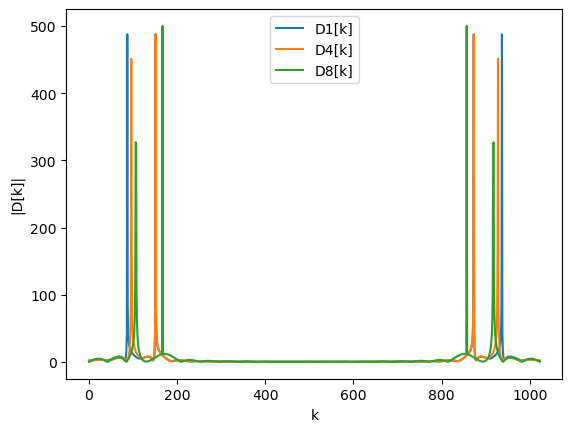

In [19]:
#Meros 2.2

# orizoume tis statheres mas
fs = 8192
N = 1024

# DFT of d1[n], d4[n], and d8[n]
D1 = np.abs(np.fft.fft(d1, N))
D4 = np.abs(np.fft.fft(d4, N))
D8 = np.abs(np.fft.fft(d8, N))

f = np.linspace(0, fs, N, endpoint=False)

# Plotting the DFTs
plt.plot(D1, label='D1[k]')
plt.plot(D4, label='D4[k]')
plt.plot(D8, label='D8[k]')
plt.legend()
plt.xlabel('k')
plt.ylabel('|D[k]|')
plt.show()

In [20]:
#Meros 2.3
import soundfile as sf 
 
#vazw ola ta signs se ena array
d = [d0,d1,d2,d3,d4,d5,d6,d7,d8,d9]

# to athrisma twn AM mas: 06241229
sum_reg="06241229"

zeros = np.zeros(100)#gia ta kena metaksi twn koumpiwn
 
tones = []
for digit in sum_reg:
    tones.append(d[int(digit)])
    # Add 100 zeros gia pafsi
    tones.append(zeros)


tone_seq = np.concatenate(tones)#den doulevei xwris afto

# Save the signal to a WAV file
sf.write('tone_sequence.wav', tone_seq, 8192)

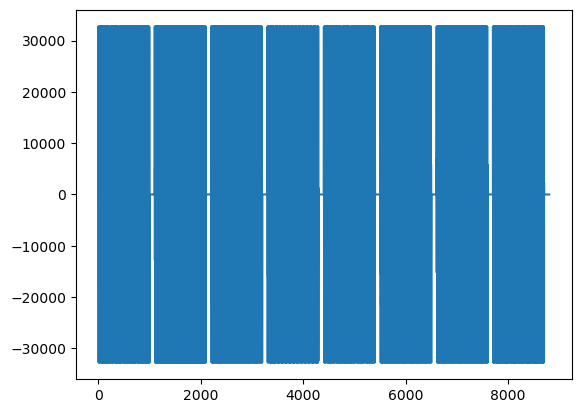

In [21]:
import IPython
import scipy as sp

fs, x = sp.io.wavfile.read("tone_sequence.wav")

plt.plot(x)
plt.show()

In [22]:
IPython.display.Audio(x,rate=8192)

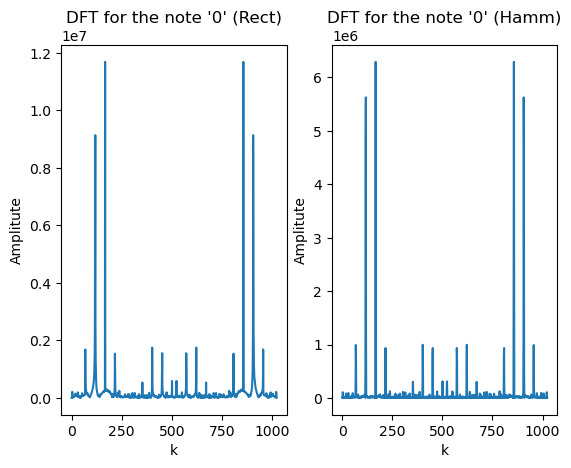

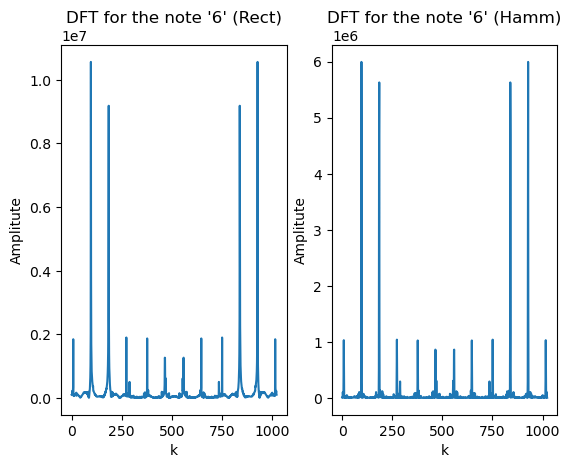

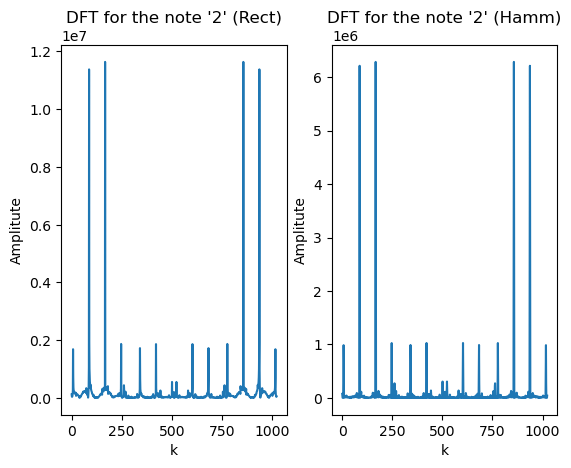

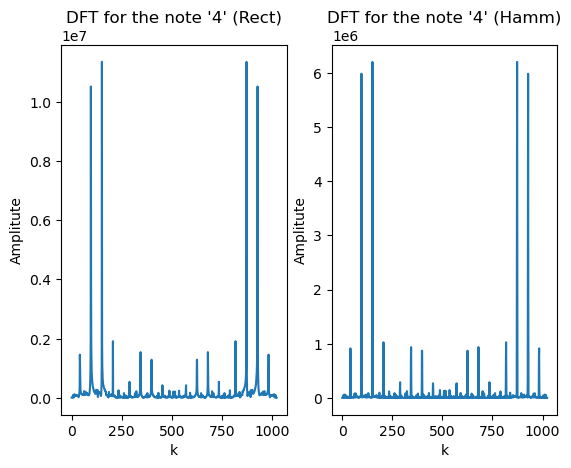

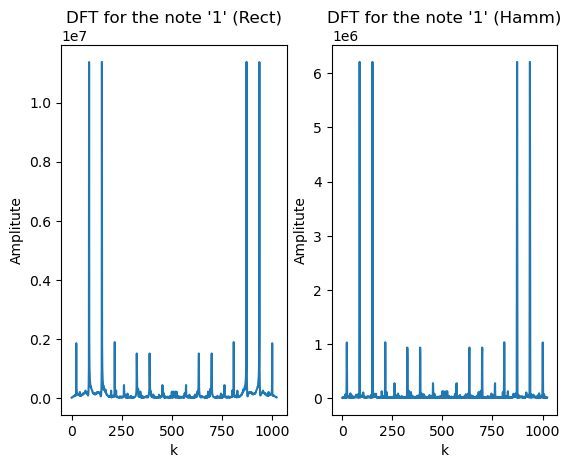

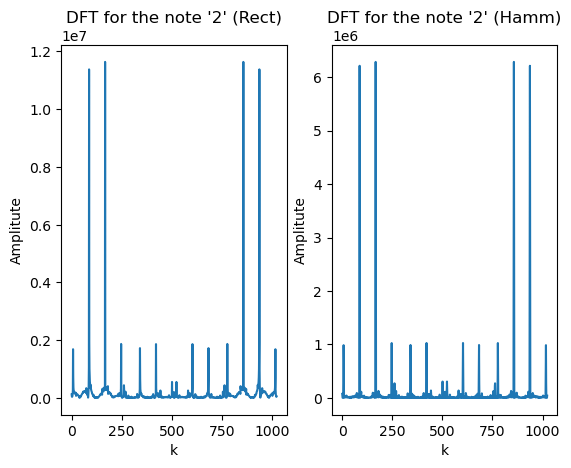

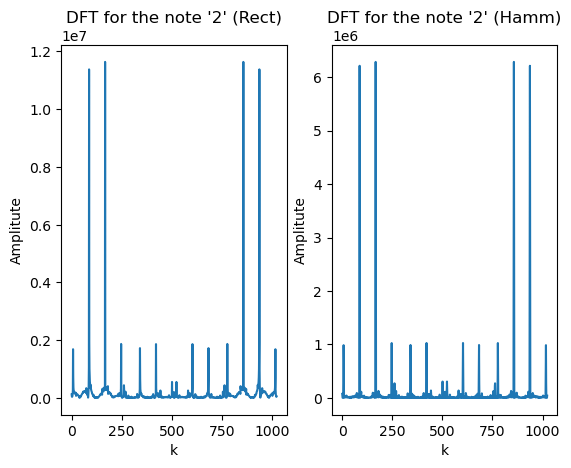

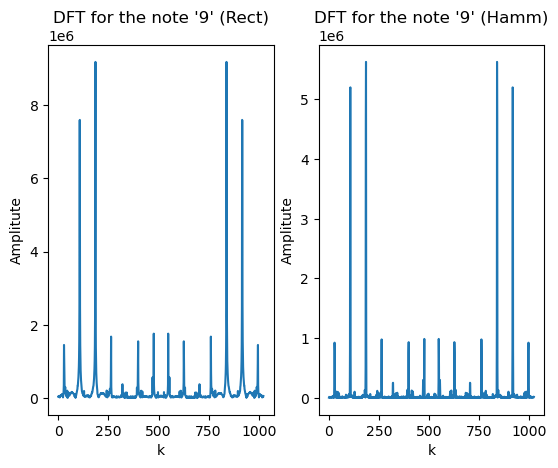

In [23]:
#Meros 2.4
L=1000
w=np.hamming(1000)
number_of_tones = len(sum_reg)

for i in range(number_of_tones):
    start = i * (L+len(zeros))
    end = start + L
    
    notesq = x[start:end] #to digit pu patame #quad window
    notehm = notesq * w #window hamming
    
    fft_note_sq = np.fft.fft(notesq,n=1024)
    fft_note_hm = np.fft.fft(notehm,n=1024)
    
    fig, axs = plt.subplots(1, 2)
    
    axs[0].plot(np.abs(fft_note_sq))
    axs[0].set_title("DFT for the note \'%s\' (Rect)"%sum_reg[i])
    axs[0].set_xlabel("k")
    axs[0].set_ylabel("Amplitute")

    axs[1].plot(np.abs(fft_note_hm))
    axs[1].set_title("DFT for the note \'%s\' (Hamm)"%sum_reg[i])
    axs[1].set_xlabel("k")
    axs[1].set_ylabel("Amplitute") 

In [24]:
    
    #Μερος 2.5
    
    #0 167 118
    #1 151 87
    #2 167 87
    #3 87 185
    #4 151 96
    #5 167 96
    #6 96 185
    #7 151 107
    #8 167 107
    #9 185 107
    

In [25]:
def top_indexes(arr):#ena funtion pu epistrefei ta 2 megista apo ena array
    top_idx = []
    d = []
    for _ in range(2):
        max_val = 0
        max_idx = 0
        for i, val in enumerate(arr):
            if val > max_val and i not in d:
                max_val = val
                max_idx = i
        top_idx.append(max_idx)
        d.append(max_idx)
    return top_idx[0],top_idx[1]

In [26]:
#Meros 2.6
def ttdecode(signIn):
    pos_freq=[[0,167,118],[1,151,87],[2,167,87],[3,87,185],[4,151,96],[5,167,96],[6,96,185],[7,151,107],[8,167,107],[9,185,107]]
    digits = []
        
    L = 1000
    N = 1024
    i=0
    while i<len(signIn):
        tone = signIn[i:i+L]
        dft_t=np.fft.fft(tone,n=N)
        dft_t=np.abs(dft_t)
        peak1,peak2=(top_indexes(dft_t[0:500]))
        for j in range(10): 
            if np.abs(peak1-pos_freq[j][1])<=1 and np.abs(peak2-pos_freq[j][2])<=1:
                digits.append(j)
        i+=L
        while i<len(signIn) and np.abs(signIn[i])<0.3:
            i+=1
    return digits
                    
fs, x = sp.io.wavfile.read("tone_sequence.wav")
print(ttdecode(x))
            


[0, 6, 2, 4, 1, 2, 2, 9]


easy: 31404815
medium: 3248821096
hard: 2044963764


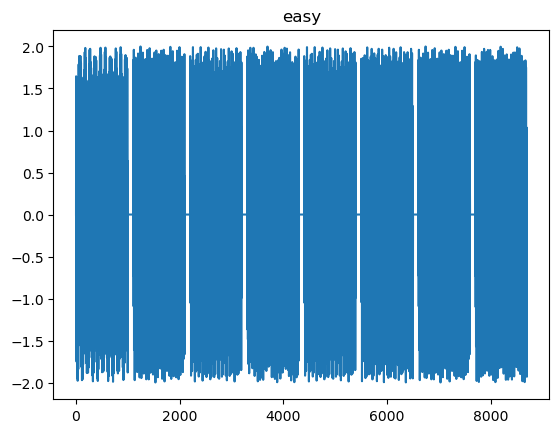

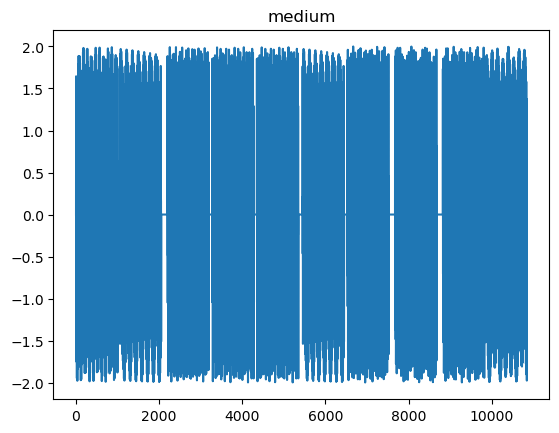

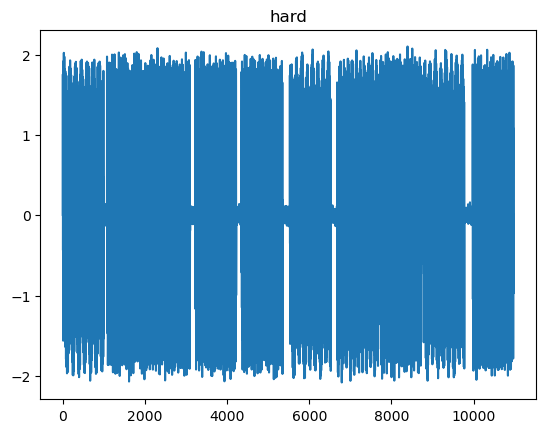

In [27]:
#Meros 2.7
audio_easy = np.load('easy_sig.npy')
plt.plot(audio_easy)
plt.title("easy")
print("easy: ",end="")
for i in ttdecode(audio_easy):
    print(i,end="")
print()

plt.figure()
audio_mid = np.load('medium_sig.npy')
plt.plot(audio_mid)
plt.title("medium")
print("medium: ",end="")
for i in ttdecode(audio_mid):
    print(i,end="")
print() 


plt.figure()
audio_hard = np.load('hard_sig.npy')
plt.plot(audio_hard) 
plt.title("hard")
print("hard: ",end="")
for i in ttdecode(audio_hard):
    print(i,end="")
print()